In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results_data = "Resources/Study_results_data.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results_data)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
Merged_data = pd.merge(mouse_metadata, study_results, how="inner", on = "Mouse ID")

# Display the data table for preview
Merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice
Number_of_Mice = mouse_metadata["Mouse ID"].count()
Number_of_Mice


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_duplicate = Merged_data[Merged_data.duplicated(["Mouse ID","Timepoint"],keep="first")]
print(data_duplicate["Mouse ID"].value_counts())
print(data_duplicate)

g989    5
Name: Mouse ID, dtype: int64
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Final_data = Merged_data[Merged_data["Mouse ID"] != "g989"]
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [9]:
# Checking the number of mice in the clean DataFrame.
final_mice = Final_data["Mouse ID"].count()
final_mice

1880

In [10]:
# Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen = Final_data.groupby(["Drug Regimen"])

mean_drug = drug_regimen["Tumor Volume (mm3)"].mean()

median_drug = drug_regimen["Tumor Volume (mm3)"].median()

stdev_drug= drug_regimen["Tumor Volume (mm3)"].std()

variance_drug = drug_regimen["Tumor Volume (mm3)"].var()

SEM_drug = drug_regimen["Tumor Volume (mm3)"].sem()

overall_drug = pd.DataFrame({"Mean": mean_drug,
                             "Median": median_drug, 
                             "Standard Deviation": stdev_drug, 
                             "Variance": variance_drug,
                             "SEM": SEM_drug})
overall_drug

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

Text(0, 0.5, 'Number of Mouse')

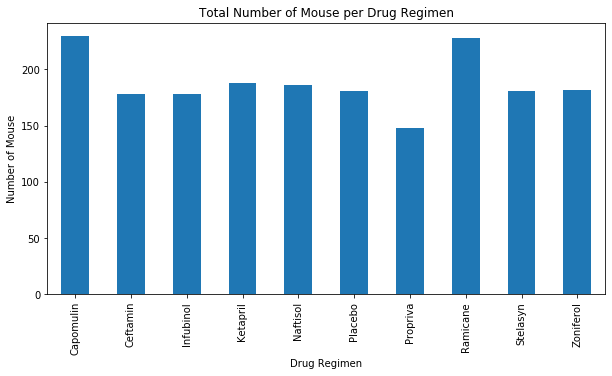

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas
drug_count = drug_regimen['Mouse ID'].count()

drug_count.plot.bar(figsize = (10,5))

plt.title("Total Number of Mouse per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")

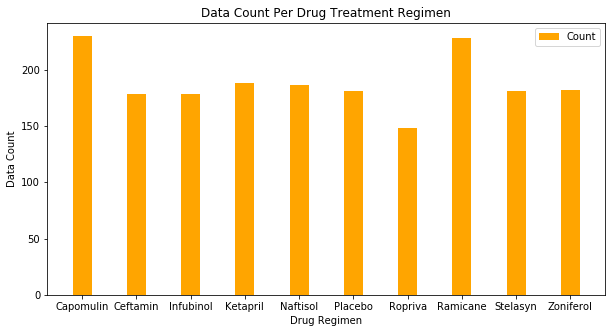

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_count))
tick_label = [x for x in x_axis]

plt.figure(figsize=(10,5))

plt.bar(x_axis, drug_count, width=0.35, color="orange")
plt.xticks(tick_label, 
           ["Capomulin", "Ceftamin", "Infubinol", 
            "Ketapril", "Naftisol", "Placebo", 
            "Ropriva", "Ramicane", "Stelasyn", "Zoniferol"])

plt.title("Data Count Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Count")
plt.legend(["Count"], loc="best");

Text(0, 0.5, 'Gender')

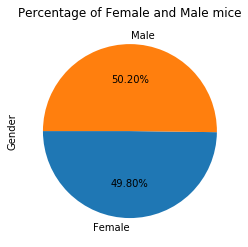

In [14]:
mouse_gender = mouse_metadata.groupby("Sex").count()

count_gender = mouse_gender["Mouse ID"]

mouse_gender["Mouse ID"].plot.pie(y = count_gender, 
                               startangle = 180, 
                               autopct = "%2.2f%%")

plt.title("Percentage of Female and Male mice")
plt.ylabel("Gender")

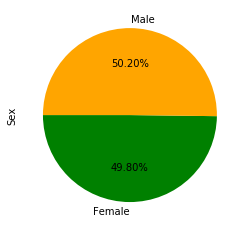

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
colors = ["Green", "Orange"]
explode = (0,0)

plt.pie(count_gender,
        labels = labels,
        colors = colors,
        startangle = 180,
        autopct = '%2.2f%%')

plt.ylabel('Sex');



In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
